In [22]:
import pickle
import numpy as np
import cv2
import json
import matplotlib.pyplot as plt


In [11]:
with (open("../data/tusimple_vids_jl/tusimple1_detection.pkl", "rb")) as openfile:
    centernet_detections = pickle.load(openfile)
print(centernet_detections[1])

[{'score': 0.7112239, 'class': 1, 'ct': [633.3988647460938, 272.3545837402344], 'tracking': array([4.963379 , 3.1537476], dtype=float32), 'bbox': array([591.9897 , 234.52118, 666.89233, 302.88998], dtype=float32), 'dep': array([26.702375], dtype=float32), 'dim': array([1.6562486, 1.8880975, 4.4797583], dtype=float32), 'alpha': -1.5296863317489624, 'loc': array([-0.1958507, -1.772255 , 26.702375 ], dtype=float32), 'rot_y': -1.5370207949551333, 'tracking_id': 1, 'age': 1, 'active': 1}, {'score': 0.60119796, 'class': 1, 'ct': [440.6820983886719, 268.04425048828125], 'tracking': array([5.5      , 2.3063965], dtype=float32), 'bbox': array([398.93375, 240.24605, 474.82956, 292.61902], dtype=float32), 'dep': array([31.182556], dtype=float32), 'dim': array([1.515679 , 1.8631358, 4.4380054], dtype=float32), 'alpha': -1.4290672540664673, 'loc': array([-6.9058237, -2.4281783, 31.182556 ], dtype=float32), 'rot_y': -1.6470138623120547, 'tracking_id': 2, 'age': 1, 'active': 1}, {'score': 0.42060608,

In [12]:
with open('../data/tusimple_test_image_results1/img_lane_points_1.json') as f:
    lanes_dict = json.load(f)
print(lanes_dict['1'])

[[[702, 249], [714, 259], [722, 268], [736, 281], [748, 292], [758, 299], [770, 308], [783, 320], [798, 335], [810, 342], [823, 352], [838, 363], [853, 377], [857, 380], [884, 397], [888, 402], [893, 407], [930, 431], [942, 440], [951, 450], [966, 461], [985, 473], [970, 463], [991, 477], [1014, 493], [1035, 511], [1026, 501], [1047, 521], [1080, 544], [1065, 534], [1102, 559], [1087, 548], [1129, 577], [1177, 608], [1161, 598], [1146, 588], [1200, 624], [1184, 614]], [[622, 249], [586, 261], [553, 272], [522, 282], [503, 289], [478, 298], [443, 309], [399, 322], [378, 330], [345, 339], [314, 350], [269, 364], [262, 366], [204, 383], [191, 388], [116, 411], [94, 418], [62, 427], [29, 438]], [[661, 250], [660, 261], [651, 272], [647, 281], [641, 292], [637, 300], [628, 311], [621, 323], [618, 330], [608, 338], [602, 348], [596, 360], [582, 375], [580, 378], [570, 396], [564, 401], [556, 408], [551, 415], [527, 443], [541, 433], [526, 444], [518, 457], [510, 471], [494, 487], [479, 505],

In [36]:
bbox_trial = centernet_detections[1][0]['bbox'].astype(int)
bbox_trial

array([591, 234, 666, 302])

In [56]:
def bbox_to_lane_id(bbox, lanes_list):
    bottom_edge_center = ((bbox[0]+bbox[2])//2, bbox[3])
    closest_lane_points = []
    for lane in lanes_list:
        lane = np.array(lane)
        y_diffs = np.abs(lane[:,1]-bottom_edge_center[1])
        point = lane[np.argmin(y_diffs)]
        print(point)
        closest_lane_points.append(point)
        
    x_coords = [point[0] for point in closest_lane_points]
    x_coords+=[0,2000] # add end points for corner lanes
    x_coords.sort()
    print(x_coords)
    for i in range(1,len(x_coords)):
        if bottom_edge_center[0]>=x_coords[i-1] and bottom_edge_center[0] <= x_coords[i]:
            return i
    return -1

In [57]:
bbox_to_lane_id(bbox_trial, lanes_dict['1'])

[758 299]
[478 298]
[637 300]
[0, 478, 637, 758, 2000]


2

In [44]:
img = cv2.imread('../data/tusimple_test_image_results1/1.jpg')
st = (bbox_trial[0],bbox_trial[1])
en = (bbox_trial[2],bbox_trial[3])
color = (255,0,0)
image = cv2.rectangle(img, st, en, color, 3) 


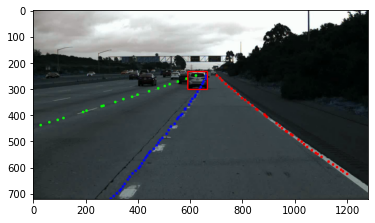

In [45]:
plt.imshow(img)